<a href="https://colab.research.google.com/github/PrzemyslawTrabuc/GoogleColab-files/blob/main/zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Przemysław Trabuć, Rok V, Informatyka**

Import bibliotek
Wczytanie danych -> auto4.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving auto4.csv to auto4.csv


Wyświetlenie danych

In [ ]:
auto = pd.read_csv("auto4.csv", index_col=False) 
# Preview the first 5 lines of the loaded data 
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage,exp_opinion
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25795km,3.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,10860km,NaN
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,86820km,2.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,64886km,5.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,16265km,3.0


In [ ]:
# Count missing data
column_names = auto.columns
counter = auto[column_names].isnull().sum()
print (counter)

mpg               8
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
year              0
origin            0
name              0
mileage           0
exp_opinion     181
dtype: int64


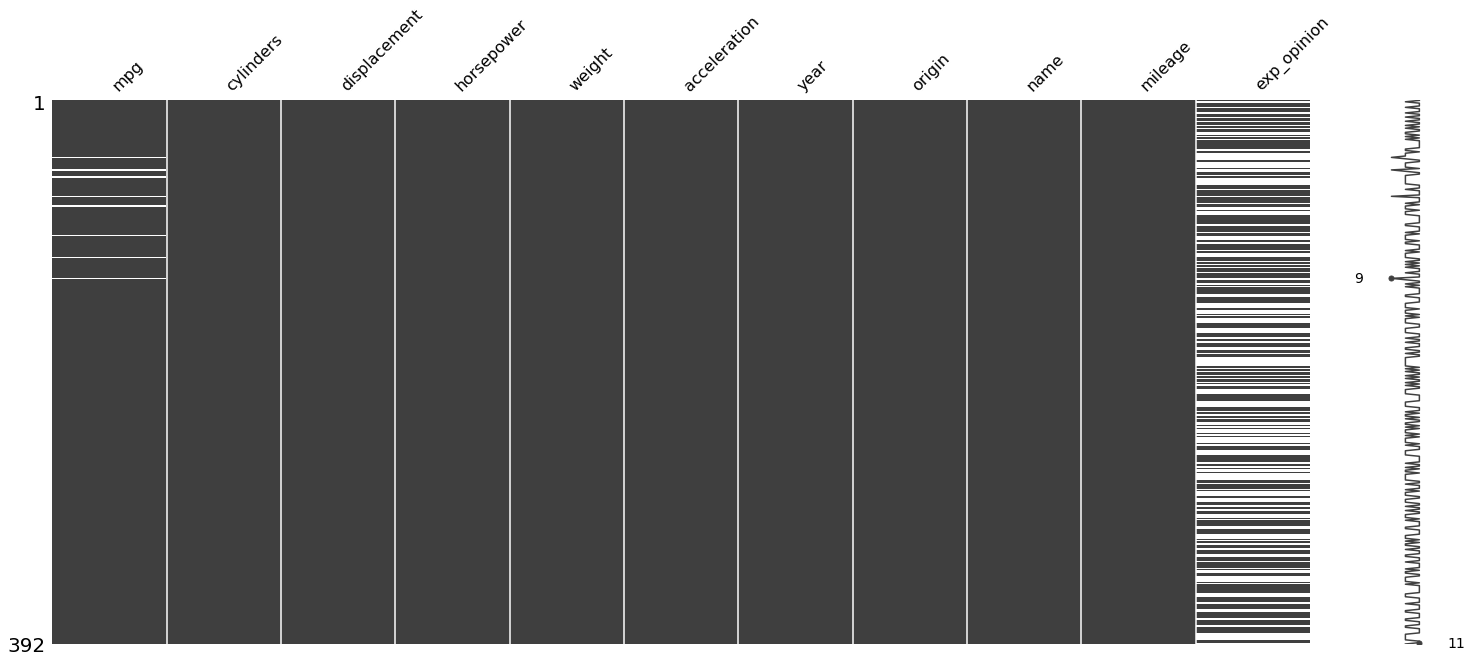

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(auto)
plt.show()

Usunięcie kolumny 'exp opinion' z powodu wielu brakujących wpisów

In [ ]:
cols_to_drop = ['exp_opinion']
auto = auto.drop(cols_to_drop, axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25795km
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,10860km
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,86820km
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,64886km
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,16265km


In [ ]:
column_names = auto.columns
counter = auto[column_names].isnull().sum()
print (counter)

mpg             8
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
mileage         0
dtype: int64


Usunięcie wybrakowanych danych (usunięcie obserwacji z brakującymi danymi - usunięcie wierszy)

In [ ]:
# first create missing indicator for features with missing data
for col in auto.columns:
    missing = auto[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        auto['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in auto.columns if 'ismissing' in col]
auto['num_missing'] = auto[ismissing_cols].sum(axis=1)


# drop rows with a lot of missing values.
ind_missing = auto[auto['num_missing'] > 0].index

auto = auto.drop(ind_missing, axis=0)
print(auto)


created missing indicator for: mpg
      mpg  cylinders  displacement  ...  mileage  mpg_ismissing  num_missing
0    18.0          8         307.0  ...  25795km          False            0
1    15.0          8         350.0  ...  10860km          False            0
2    18.0          8         318.0  ...  86820km          False            0
3    16.0          8         304.0  ...  64886km          False            0
4    17.0          8         302.0  ...  16265km          False            0
..    ...        ...           ...  ...      ...            ...          ...
387  27.0          4         140.0  ...  66661km          False            0
388  44.0          4          97.0  ...  41024km          False            0
389  32.0          4         135.0  ...  80313km          False            0
390  28.0          4         120.0  ...  63006km          False            0
391  31.0          4         119.0  ...  25338km          False            0

[384 rows x 12 columns]


In [ ]:
# Count missing data
column_names = auto.columns
counter = auto[column_names].isnull().sum()
print (counter)

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
year             0
origin           0
name             0
mileage          0
mpg_ismissing    0
num_missing      0
dtype: int64


Pozbyliśmy się brakujących danych, teraz jeszcze musimy usunąć dodane kolumny pomocnicze 


In [ ]:
# If we want to remove additional columns
cols_to_drop = ['mpg_ismissing','num_missing']
auto = auto.drop(cols_to_drop, axis=1)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25795km
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,10860km
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,86820km
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,64886km
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,16265km


Odcięcie "KM"
Zamiana kolumny 'MILEAGE' STR->INT

In [ ]:
# Strip mileage of km
auto['mileage_trim'] = auto['mileage'].str.strip("km")

# Convert mileage to integer
auto['mileage'] = auto['mileage_trim'].astype('int')

assert auto['mileage'].dtype == 'int'

print(auto[['mileage','mileage_trim']].head())
#auto['mileage'] = auto['mileage_trim']
cols_to_drop=['mileage_trim']
auto = auto.drop(cols_to_drop,axis = 1)
auto.head()
#print(auto['mileage'].mean())


   mileage mileage_trim
0    25795        25795
1    10860        10860
2    86820        86820
3    64886        64886
4    16265        16265


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25795
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,10860
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,86820
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,64886
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,16265


Usuwanie danych spoza ustalonego zakresu

Sprawdzamy jakie są unikalne roczniki aut

In [ ]:
print(auto['year'].describe())
print(auto['year'].unique())

count    384.000000
mean      76.278646
std        4.388802
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       99.000000
Name: year, dtype: float64
[70 71 72 73 74 75 76 77 78 79 80 81 82 91 98 99 94 96]


Ustalenie rocznika aut na max 82, wszystkie wartości większe ustawione na 82

In [ ]:
# Convert year to int
auto['year'] = auto['year'].astype('int')

# Set all values above 82 to 82
auto.loc[auto['year'] > 82, 'year'] = 82

auto['year'] = auto['year'].astype('category')

print(auto['year'].describe())

count     384
unique     13
top        73
freq       38
Name: year, dtype: int64


Wyszukiwanie wszystkich pełnych duplikatów

In [ ]:
# Find a duplicate rows
duplicated_rows= auto[auto.duplicated()]
print(duplicated_rows)

     mpg  cylinders  displacement  ...  origin               name  mileage
30  27.0          4          97.0  ...       3       datsun pl510    69150
31  27.0          4          97.0  ...       3       datsun pl510    69150
59  23.0          4          97.0  ...       2  volkswagen type 3    29457
60  23.0          4          97.0  ...       2  volkswagen type 3    29457

[4 rows x 10 columns]


Usuwanie pełnych duplikatów

In [ ]:
# Drop complete duplicates from auto
print(auto)
auto = auto.drop_duplicates()
print(auto)

      mpg  cylinders  displacement  ...  origin                       name  mileage
0    18.0          8         307.0  ...       1  chevrolet chevelle malibu    25795
1    15.0          8         350.0  ...       1          buick skylark 320    10860
2    18.0          8         318.0  ...       1         plymouth satellite    86820
3    16.0          8         304.0  ...       1              amc rebel sst    64886
4    17.0          8         302.0  ...       1                ford torino    16265
..    ...        ...           ...  ...     ...                        ...      ...
387  27.0          4         140.0  ...       1            ford mustang gl    66661
388  44.0          4          97.0  ...       2                  vw pickup    41024
389  32.0          4         135.0  ...       1              dodge rampage    80313
390  28.0          4         120.0  ...       1                ford ranger    63006
391  31.0          4         119.0  ...       1                 chevy s-10  

In [ ]:
# Sprawdzamy czy usunięto pełne duplikaty
duplicated_rows = auto[auto.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name, mileage]
Index: []


Usunięcie dla powielonych wpisów dla samochodów o identycznym przebiegu (MILEAGE). Wpisy w kolumnie MPG zastąpiono średnią z powielonych danych z tej kolumny

In [ ]:
# Find duplicates
duplicates = auto.duplicated(subset = 'mileage', keep = False)

# Sort your duplicated auto
duplicated_auto = auto[duplicates].sort_values(by = 'mileage')

# Print relevant columns of auto
print(duplicated_auto)

# Print relevant columns of auto
print(duplicated_auto[['mileage']])



NameError: ignored

Usuwanie niepełnych duplikatów w kolumnie 'mileage'

In [ ]:
# Create statistics dictionary for aggregation function
statistics = {'mpg': 'mean'}

# Group by mileage and compute new statistics
auto_unique = auto.groupby('mileage').agg(statistics).reset_index()


filtred_data = (auto_unique[['mileage','mpg']])
print(filtred_data[250:300])


     mileage   mpg
250    69735  22.0
251    70263  15.0
252    70713  39.4
253    71087  28.0
254    71135  17.0
255    71228  13.0
256    71267  20.3
257    71373  23.0
258    71434  19.4
259    71858  12.0
260    72003  16.0
261    72592  12.0
262    72623  24.0
263    72955  18.0
264    73208  44.6
265    73335  15.0
266    73704  13.0
267    73734  26.5
268    74044  19.0
269    74505  21.0
270    74820  14.0
271    74925  21.0
272    75318  22.0
273    75697  12.0
274    75726  26.6
275    75733  13.0
276    76105  37.7
277    76199  22.0
278    76235  32.4
279    76320  25.4
280    76690  18.1
281    76803  19.0
282    76842  20.0
283    77172  22.5
284    77214  31.0
285    77221  15.0
286    77270  15.5
287    77435  16.0
288    77563  13.0
289    77863  16.5
290    77969  27.0
291    78148  28.0
292    78497  21.5
293    78840  25.0
294    79092  14.0
295    79163  16.0
296    79479  24.0
297    80031  36.0
298    80091  25.4
299    80271  35.7


Ostateczne wyszukiwanie duplikatów - sprawdzenie czy wszystko usunięto

In [ ]:
# Find duplicated values again
duplicates = auto_unique.duplicated(subset = 'mileage', keep = False)
duplicated_auto = auto_unique[duplicates == True]

print(duplicated_auto)

NameError: ignored

## **Wykresy**

In [ ]:
import pandas as pd
import numpy as np
import json
import datetime
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns

Ustalenie wartości mileage i mpg na numeryczne





In [ ]:
# Convert mileage and mpg to numeric
auto['mileage'] = pd.to_numeric(auto['mileage'])
auto['mpg'] = pd.to_numeric(auto['mpg'])



In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25795
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,10860
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,86820
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,64886
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,16265


Spalanie jest powiązane z rocznikiem auta, nowsze modele cechują się mniejszym spalaniem i większym zasięgem

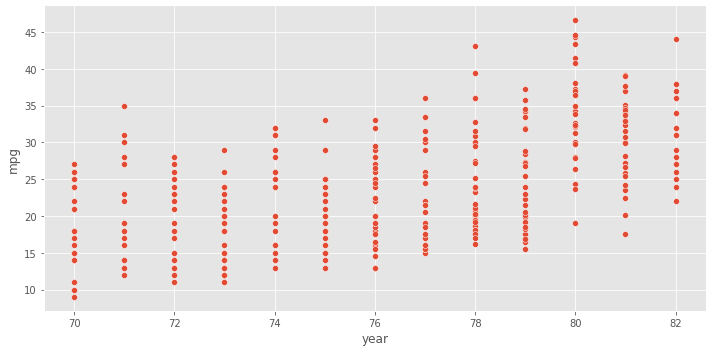

In [ ]:
sns.relplot(x='year', y='mpg', data=auto, aspect=2.0)

Najczęściej otrzymywana wartość spalania wśród wyznaczoznych aut wahała się pomiędzy 15-20 mpg

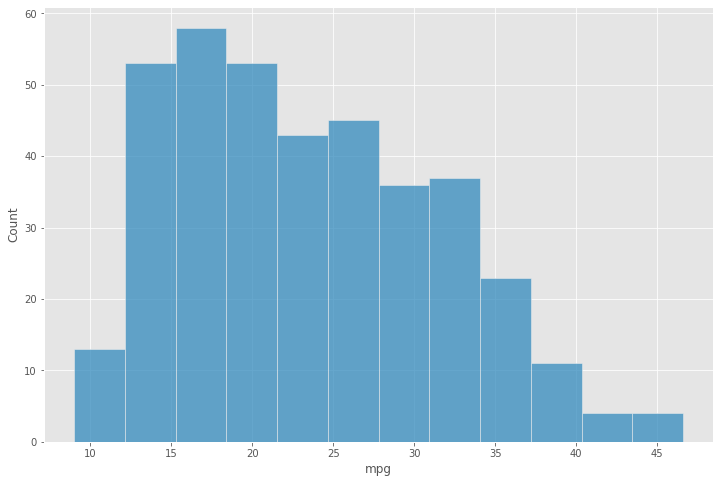

In [ ]:
sns.histplot(x='mpg',data=auto)

Auta o większej mocy cechują się większym spalaniem

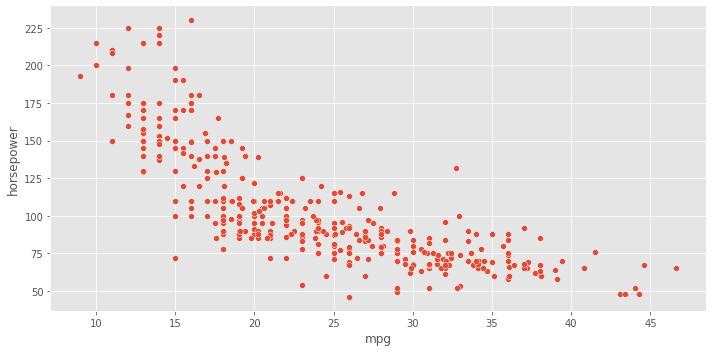

In [ ]:
sns.relplot(x='mpg', y='horsepower', data=auto, aspect=2.0)